In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Loading data

In [34]:
weather_a = pd.read_csv('data/2149507.csv')
mobility = pd.read_csv('data/Global_Mobility_Report.csv', dtype = {'sub_region_1': str, 'sub_region_2': str})
china_mobility = pd.read_csv('data/China_(City Movement Intensity) 0101-0502.csv')
us_cases = pd.read_csv('data/US_covid_by_county.csv')
china_cases = pd.read_csv('data/China_covid_by_city.csv') 
decentralization = pd.read_excel('data/Kopie+von+Ivanyna+Shah+Decentralization+Dataset+Jan+2014.xls', 'Data')
mobilityus = pd.read_csv('data/mobilityus.csv')
covid_stringency = pd.read_csv('data/covid-stringency-index.csv')
county_pres = pd.read_csv('data/countypres_2000-2016.csv')

##  Centralized Dataframe

In [44]:
data = mobilityus.dropna().copy()
data.date = pd.to_datetime(data.date)
data

state abbreviation          county       date  retail  grocery  \
101     Alabama           AL  Baldwin County 2020-02-15    17.0     12.0   
102     Alabama           AL  Baldwin County 2020-02-16     8.0      8.0   
103     Alabama           AL  Baldwin County 2020-02-17     9.0      9.0   
104     Alabama           AL  Baldwin County 2020-02-18     7.0      8.0   
105     Alabama           AL  Baldwin County 2020-02-19    12.0      9.0   
...         ...          ...             ...        ...     ...      ...   
240092  Wyoming           WY  Natrona County 2020-05-15   -11.0      6.0   
240096  Wyoming           WY  Natrona County 2020-05-19     2.0     10.0   
240097  Wyoming           WY  Natrona County 2020-05-20     2.0      5.0   
240098  Wyoming           WY  Natrona County 2020-05-21     1.0     12.0   
240099  Wyoming           WY  Natrona County 2020-05-22    -7.0      9.0   

        parks  transit  workplaces  residential  stay_at_home  dem_share  \
101      55.0      8.0         6.0         -2.0             0   0.193856   
102     -12.0      7.0        -3.0          2.0             0   0.193856   
103      31.0      7.0        -3.0          1.0             0   0.193856   
104      21.0      0.0         2.0          0.0             0   0.193856   
105      41.0      8.0         3.0         -1.0             0   0.193856   
...       ...      ...         ...          ...           ...        ...   
240092   67.0    -16.0       -27.0         10.0             1   0.197223   
240096   93.0    -19.0       -25.0          8.0             1   0.197223   
240097   49.0    -19.0       -26.0          9.0             1   0.197223   
240098   48.0     -5.0       -27.0          8.0             1   0.197223   
240099  103.0      1.0       -29.0          8.0             1   0.197223   

         income       pop  pct_pov  covid_cases  
101     57588.0  223234.0      9.8          0.0  
102     57588.0  223234.0      9.8          0.0  
103     57588.0  223234.0      9.8          0.0  
104     57588.0  223234.0      9.8          0.0  
105     57588.0  223234.0      9.8          0.0  
...         ...       ...      ...          ...  
240092  64714.0   79858.0      9.9         39.0  
240096  64714.0   79858.0      9.9         49.0  
240097  64714.0   79858.0      9.9         64.0  
240098  64714.0   79858.0      9.9         66.0  
240099  64714.0   79858.0      9.9         67.0  

[43714 rows x 16 columns]

## Plots
5 counties for retail

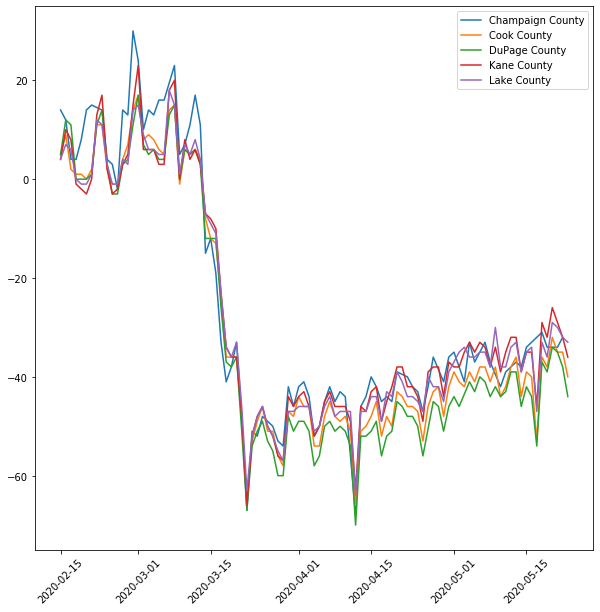

In [76]:
plt.figure(figsize = (10, 10))
state = data[data.state == 'Illinois']
for county in state.county.unique()[:5]:
    plt.plot(state[state.county == county].date, state[state.county == county].retail, label = county)
plt.xticks(rotation = 45)
plt.legend()
plt.show()

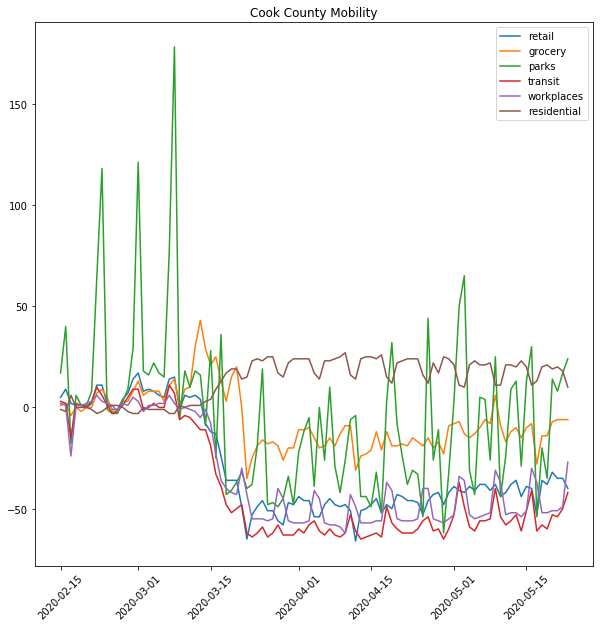

In [80]:
plt.figure(figsize = (10, 10))
state = data[data.state == 'Illinois']
for column in ['retail', 'grocery', 'parks', 'transit', 'workplaces', 'residential']:
    plt.plot(state[state.county == 'Cook County'].date, state[state.county == 'Cook County'][column], label = column)
plt.xticks(rotation = 45)
plt.title('Cook County Mobility')
plt.legend()
plt.show()

## Double LASSO - Feature Selection

In [87]:
X = data.filter(['stay_at_home', 'dem_share', 'income','pop', 'pct_pov']).values
Y = data['retail'].values

In [94]:
D = data.filter(['dem_share', 'income','pop', 'pct_pov']).values
T = data['stay_at_home'].values

In [81]:
lasso1 = Lasso()

In [88]:
lasso1.fit(X, Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
lasso1.coef_

array([-2.74659617e+01, -0.00000000e+00, -2.50934519e-04, -2.00172691e-06,
       -2.59862528e-01])

In [95]:
lasso2 = Lasso()
lasso2.fit(D, T)
lasso2.coef_

array([0.00000000e+00, 6.73432056e-07, 1.25924100e-08, 0.00000000e+00])

In [98]:
data[40000:]

state abbreviation            county       date  retail  grocery  \
211910  Virginia           VA  Albemarle County 2020-04-13   -50.0    -33.0   
211912  Virginia           VA  Albemarle County 2020-04-15   -43.0    -20.0   
211914  Virginia           VA  Albemarle County 2020-04-17   -45.0    -24.0   
211917  Virginia           VA  Albemarle County 2020-04-20   -45.0    -24.0   
211920  Virginia           VA  Albemarle County 2020-04-23   -45.0    -17.0   
...          ...          ...               ...        ...     ...      ...   
240092   Wyoming           WY    Natrona County 2020-05-15   -11.0      6.0   
240096   Wyoming           WY    Natrona County 2020-05-19     2.0     10.0   
240097   Wyoming           WY    Natrona County 2020-05-20     2.0      5.0   
240098   Wyoming           WY    Natrona County 2020-05-21     1.0     12.0   
240099   Wyoming           WY    Natrona County 2020-05-22    -7.0      9.0   

        parks  transit  workplaces  residential  stay_at_home  dem_share  \
211910  -24.0    -62.0       -61.0         24.0             1   0.587826   
211912   -5.0    -54.0       -60.0         23.0             1   0.587826   
211914    5.0    -57.0       -56.0         24.0             1   0.587826   
211917  -10.0    -57.0       -59.0         23.0             1   0.587826   
211920  -24.0    -58.0       -60.0         24.0             1   0.587826   
...       ...      ...         ...          ...           ...        ...   
240092   67.0    -16.0       -27.0         10.0             1   0.197223   
240096   93.0    -19.0       -25.0          8.0             1   0.197223   
240097   49.0    -19.0       -26.0          9.0             1   0.197223   
240098   48.0     -5.0       -27.0          8.0             1   0.197223   
240099  103.0      1.0       -29.0          8.0             1   0.197223   

         income       pop  pct_pov  covid_cases  
211910  80392.0  109330.0      8.7         46.0  
211912  80392.0  109330.0      8.7         50.0  
211914  80392.0  109330.0      8.7         54.0  
211917  80392.0  109330.0      8.7         57.0  
211920  80392.0  109330.0      8.7         68.0  
...         ...       ...      ...          ...  
240092  64714.0   79858.0      9.9         39.0  
240096  64714.0   79858.0      9.9         49.0  
240097  64714.0   79858.0      9.9         64.0  
240098  64714.0   79858.0      9.9         66.0  
240099  64714.0   79858.0      9.9         67.0  

[3714 rows x 16 columns]

### Using demeaned data (within estimator)

In [ ]:
demeaned_data = 